In [18]:
import random, numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
alphap = 2
probp = 0.75
expon = 2 * alphap - 1

In [19]:
def betadist(alpha):
    """gives a random number from beta distribution"""
    return random.betavariate(alpha,alpha)

In [20]:
def decision(probability):
    """
    decides with a given probability whether to keep the right part
    """
    if float(probability) > random.random():
        return True
    else: 
        return False

In [21]:
def splitting(segment):
    """
    splits a given segment. left and right are endpoints of the segment
    returns : 
        xL -> length of the left segment
        xR -> length of the right segment
        flag -> keeping the right segment
        xLp, xRp -> probability(unnormalized) for being selected
        change -> change of normalization const
    """
    xL = segment * betadist(alphap)
    xR = segment - xL
    flag = decision(probp)
    xLp = xL**expon
    xRp = xR**expon
    change = xLp + xRp - segment**expon
    return xL, xR, flag, xLp, xRp, change

In [22]:
# def pickindex(frag_prob, frag_prob_sum):
#     """
#     picks up a segment to be subsequently split
#     """
#     r = random.uniform(0, frag_prob_sum)
#     sum_ = 0
#     for index in range(len(frag_prob)):
#         sum_ += frag_prob[index]
#         if sum_ < r:
#             continue
#         else:
#             return index

In [23]:
def pickindex(frag_prob, frac_sum):
    """
    picks up a segment to be subsequently split
    """
    r = random.uniform(0,1)
    
    if r <= frac_sum:
        sum_ = 0
        for index in range(len(frag_prob)):
            sum_ += frag_prob[index]
            if sum_ < r:
                continue
            else:
                return index

In [24]:
def number_length(segment_lengths,flags):
    
    N = 0
    M = 0

    for i in range(len(flags)):
        if flags[i]:
            N += 1
            M += segment_lengths[i]
            pass
        pass
    return N, M

In [25]:
def bin_maker(max_value, bin_number):
    bin_size = max_value/bin_number
    bins = [0.]
    for i in range(bin_number):
        bin_edge = (i+1)*bin_size
        bins.append(bin_edge)
        pass
    return bins

In [26]:
def realization_value(total_iteration):
    
    lengths = [1.]
    flags = [True]
    frag_prob = [1.] # raw probability, not normalized
    #frag_prob_sum = 1.0 # normalization const
    frac_sum = 1.0
    
    for i in range(total_iteration + 1):
        
        #index = pickindex(frag_prob, frag_prob_sum)
        index = pickindex(frag_prob, frac_sum)
        
        if index != None and flags[index] == True:

            xL, xR, flag, xLp, xRp, change = splitting(lengths[index])
            
            lengths[index] = xL
            lengths.append(xR)
            flags.append(flag)
            frag_prob[index] = xLp 
            frag_prob.append(xRp)
            #frag_prob_sum += change
            frac_sum += change
            pass
        
    lengths = np.array(lengths)
    true_lengths = lengths[flags]
    log_lengths = np.log(true_lengths) * -1

    return log_lengths

In [27]:
def ensemble_average(total_iteration, ensemble_size, max_value = 20, bin_number = 200):

    C_ensemble = np.array([])
    
    for i in range(ensemble_size):
        log_length = realization_value(total_iteration)
        C_ensemble = np.append(C_ensemble, log_length)
        pass
    
    return C_ensemble

In [28]:
def np_histrogram(data, bin_size = 0.01):
    bin_number = int((np.max(data) - np.min(data))//bin_size) + 1
    y, x = np.histogram(data, bins = bin_number)
    return plt.plot(x[1:], y)

In [29]:
ens1 = ensemble_average(10_000, 10_000)
ens2 = ensemble_average(20_000, 10_000)
ens3 = ensemble_average(30_000, 10_000)

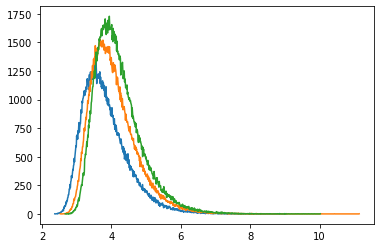

In [30]:
ens1p = np.array(ens1)
np_histrogram(ens1p)
ens2p = np.array(ens2)
np_histrogram(ens2p)
ens3p = np.array(ens3)
np_histrogram(ens3p)

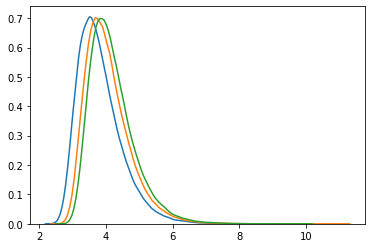

In [31]:
sns.kdeplot(ens1p)
sns.kdeplot(ens2p)
sns.kdeplot(ens3p)

In [32]:
def log_rescaled(input_array, total_iteration):
    shift = np.log(total_iteration)/expon
    outout_array = input_array - shift
    return np.asarray(outout_array)

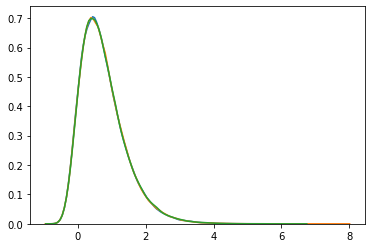

In [33]:
ens1pp = log_rescaled(ens1p, 10_000)
ens2pp = log_rescaled(ens2p, 20_000)
ens3pp = log_rescaled(ens3p, 30_000)
sns.kdeplot(ens1pp)
sns.kdeplot(ens2pp)
sns.kdeplot(ens3pp)

In [34]:
# np.savetxt('data_collapse_alpha_2', ens1p)
# np.savetxt('data_collapse_alpha_2', ens2p)
# np.savetxt('data_collapse_alpha_2', ens3p)